# Airbnb New User Bookings
- Where will a new guest book their first travel experience?
- New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.
- predict in which country a new user will make his or her first booking.

# Dataset Description

- list of users along with their demographics, web session records, and some summary statistics. You are asked to predict which country a new user's first booking destination will be. All the users in this dataset are from the USA.

- There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

- The training and test sets are split by dates. In the test set, you will predict all the new users with first activities after 7/1/2014 (note: this is updated on 12/5/15 when the competition restarted). In the sessions dataset, the data only dates back to 1/1/2014, while the users dataset dates back to 2010. - train_users.csv - the training set of users

# Features Description

- test_users.csv - the test set of users
- id: user id
- date_account_created: the date of account creation
- timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
- date_first_booking: date of first booking
- gender
- age
- signup_method
- signup_flow: the page a user came to signup up from
- language: international language preference
- affiliate_channel: what kind of paid marketing
- affiliate_provider: where the marketing is e.g. google, craigslist, other
- first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
- signup_app
- first_device_type
- first_browser
- country_destination: this is the target variable you are to predict
- sessions.csv - web sessions log for users
- user_id: to be joined with the column 'id' in users table
- action
- action_type
- action_detail
- device_type
- secs_elapsed

# Import Important Libraries

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [322]:
train = pd.read_csv("H:\\Data Science Repository\\Airbnb\\train_users_2_copy.csv")
train

,id,age,gender,language,signup_app,signup_method,signup_flow,date_account_created,date_first_activity,FA_to_AC,FA-to_FB,mins_first_activity,affiliate_channel,affiliate_provider,first_affiliate_tracked,first_device_type,first_browser,date_first_booking,country_destination
0,gxn3p5htnn,NaN,-unknown-,en,Web,facebook,0,6/28/2010,3/19/2009,466,NaN,4,direct,direct,untracked,Mac Desktop,Chrome,NaN,NDF
1,820tgsjxq7,38.0,MALE,en,Web,facebook,0,5/25/2011,5/23/2009,732,NaN,17,seo,google,untracked,Mac Desktop,Chrome,NaN,NDF
2,4ft3gnwmtx,56.0,FEMALE,en,Web,basic,3,9/28/2010,6/9/2009,476,419.0,23,direct,direct,untracked,Windows Desktop,IE,8/2/2010,US
3,bjjt8pjhuk,42.0,FEMALE,en,Web,facebook,0,12/5/2011,10/31/2009,765,1043.0,6,direct,direct,untracked,Mac Desktop,Firefox,9/8/2012,other
4,87mebub9p4,41.0,-unknown-,en,Web,basic,0,9/14/2010,12/8/2009,280,72.0,6,direct,direct,untracked,Mac Desktop,Chrome,2/18/2010,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,32.0,MALE,en,Web,basic,0,6/30/2014,6/30/2014,0,NaN,23,sem-brand,google,omg,Mac Desktop,Safari,NaN,NDF
213447,mhewnxesx9,NaN,-unknown-,en,Web,basic,0,6/30/2014,6/30/2014,0,NaN,23,direct,direct,linked,Windows Desktop,Chrome,NaN,NDF
213448,6o3arsjbb4,32.0,-unknown-,en,Web,basic,0,6/30/2014,6/30/2014,0,NaN,23,direct,direct,untracked,Mac Desktop,Firefox,NaN,NDF
213449,jh95kwisub,NaN,-unknown-,en,iOS,basic,25,6/30/2014,6/30/2014,0,NaN,23,other,other,tracked-other,iPhone,Mobile Safari,NaN,NDF


# Analytical view on the training dataset

In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   age                      125461 non-null  float64
 2   gender                   213451 non-null  object 
 3   language                 213451 non-null  object 
 4   signup_app               213451 non-null  object 
 5   signup_method            213451 non-null  object 
 6   signup_flow              213451 non-null  int64  
 7   date_account_created     213451 non-null  object 
 8   date_first_activity      213451 non-null  object 
 9   FA_to_AC                 213451 non-null  int64  
 10  FA-to_FB                 88908 non-null   float64
 11  mins_first_activity      213451 non-null  int64  
 12  affiliate_channel        213451 non-null  object 
 13  affiliate_provider       213451 non-null  object 
 14  firs

In [324]:
train.describe()

,age,signup_flow,FA_to_AC,FA-to_FB,mins_first_activity
count,125461.000000,213451.000000,213451.000000,88908.000000,213451.000000
mean,49.668335,3.267387,0.231819,44.692176,12.242112
std,155.666612,7.637707,11.948395,88.482784,8.056394
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,1.000000,4.000000
50%,34.000000,0.000000,0.000000,3.000000,15.000000
75%,43.000000,0.000000,0.000000,29.000000,20.000000
max,2014.000000,25.000000,1456.000000,1369.000000,23.000000


In [325]:
print("Missing Values overview : ") 
print(train.isnull().sum().sort_values(ascending=False))
print("-----------------------")
print("duplicated values overview : ", train.duplicated().sum())

Missing Values overview : 
FA-to_FB                   124543
date_first_booking         124543
age                         87990
first_affiliate_tracked      6065
id                              0
first_browser                   0
first_device_type               0
affiliate_provider              0
affiliate_channel               0
mins_first_activity             0
FA_to_AC                        0
date_first_activity             0
date_account_created            0
signup_flow                     0
signup_method                   0
signup_app                      0
language                        0
gender                          0
country_destination             0
dtype: int64
-----------------------
duplicated values overview :  0


In [326]:
# function set_age_group_2 : categorize the age into groups to show specs of each age group
def set_age_group_2(x):
    if x < 40:
        return '15 to 39'
    elif x >=40 and x < 60:
        return '40 to 59'
    elif x >= 60 and x <= 75:
        return '60 to 75'
    else:
        return '> 125'  

In [327]:
train['age_group'] = train['age'].apply(set_age_group_2)

# Finding Destination Distribution.

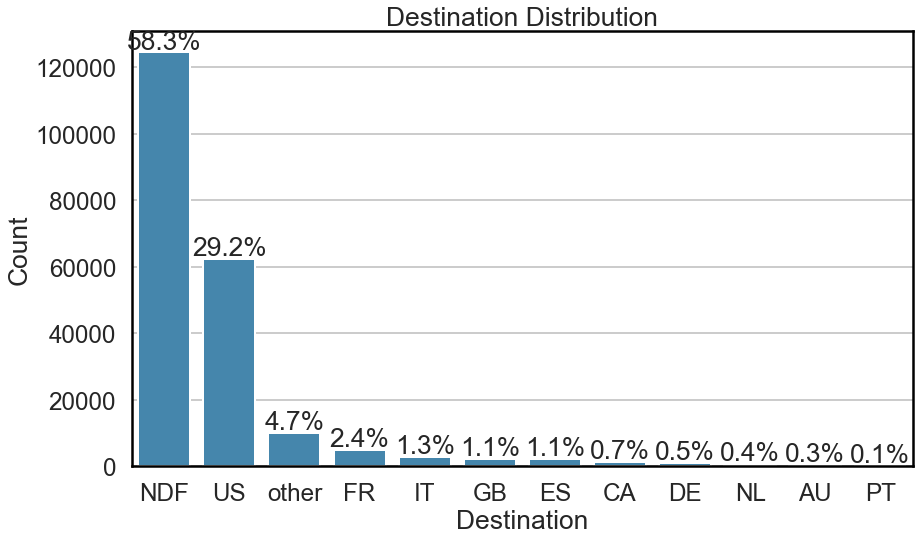

In [328]:

plt.figure(figsize=(14,8))
order1 = train['country_destination'].value_counts().index
sns.countplot(data = train, x = 'country_destination', order = order1, color = sns.color_palette()[1])
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Destination Distribution')
order2 = train['country_destination'].value_counts()

for i in range(order2.shape[0]):
    count = order2[i]
    strt='{:0.1f}%'.format(100*count / train.shape[0])
    plt.text(i,count+1000,strt,ha='center')

# users segments 
- most age group using Airbnb are from 15 to 40.
- from 15 to 40 is the most age group that the number of users is increasing by the time.

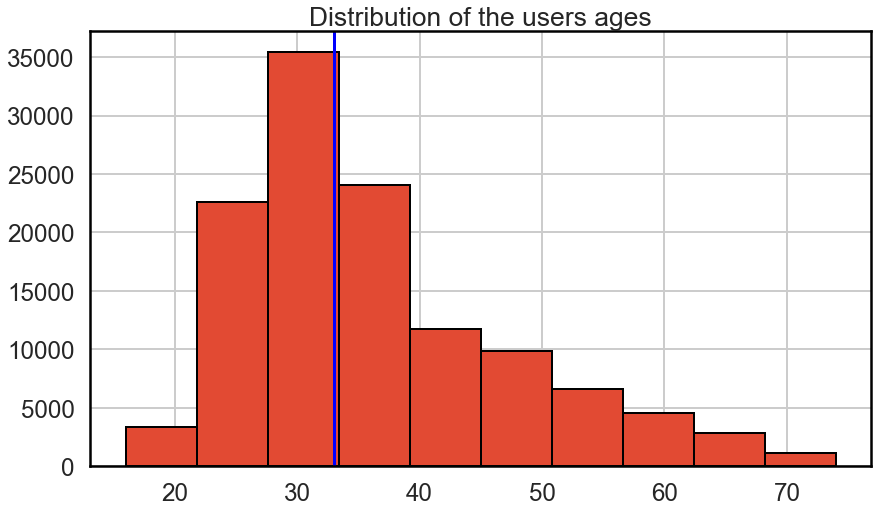

In [329]:
age_group = train.query('age > 15 and age < 75')
age_median = age_group['age'].median()

plt.figure(figsize=(14,8))
plt.hist(age_group['age'], edgecolor='black')
plt.title("Distribution of the users ages")
plt.axvline(age_median, color='blue', label='Median Age')

# users segments with :
# 1) affiliate channel (what kind of paid marketing)
- regardless what kind of paid marketing, the advertisings providers more likely to target the age group from 15 to 40.

# 2) time taken from first activity to account created
- from 15 to 40 age group is the most age group take time from first activity until create their airbnb account.

In [330]:
age_group_1 = train.query('age_group == "15 to 39" and affiliate_channel=="direct"').shape[0]
age_group_2 = train.query('age_group == "40 to 59" and affiliate_channel=="direct"').shape[0]
age_group_3 = train.query('age_group == "60 to 75" and affiliate_channel=="direct"').shape[0]

x=['15 to 39','40 to 59','60 to 75']
y=[age_group_1, age_group_2, age_group_3]

In [331]:
age_group1 = sum(train.loc[train['age_group'] == '15 to 39','FA_to_AC'])
age_group2 = sum(train.loc[train['age_group'] == '40 to 59','FA_to_AC'])
age_group3 = sum(train.loc[train['age_group'] == '60 to 75','FA_to_AC'])

x=['15 to 39','40 to 59','60 to 75']
y=[age_group1, age_group2, age_group3]

Text(0.5, 1.0, 'users segments & time taken from first activity to account created')

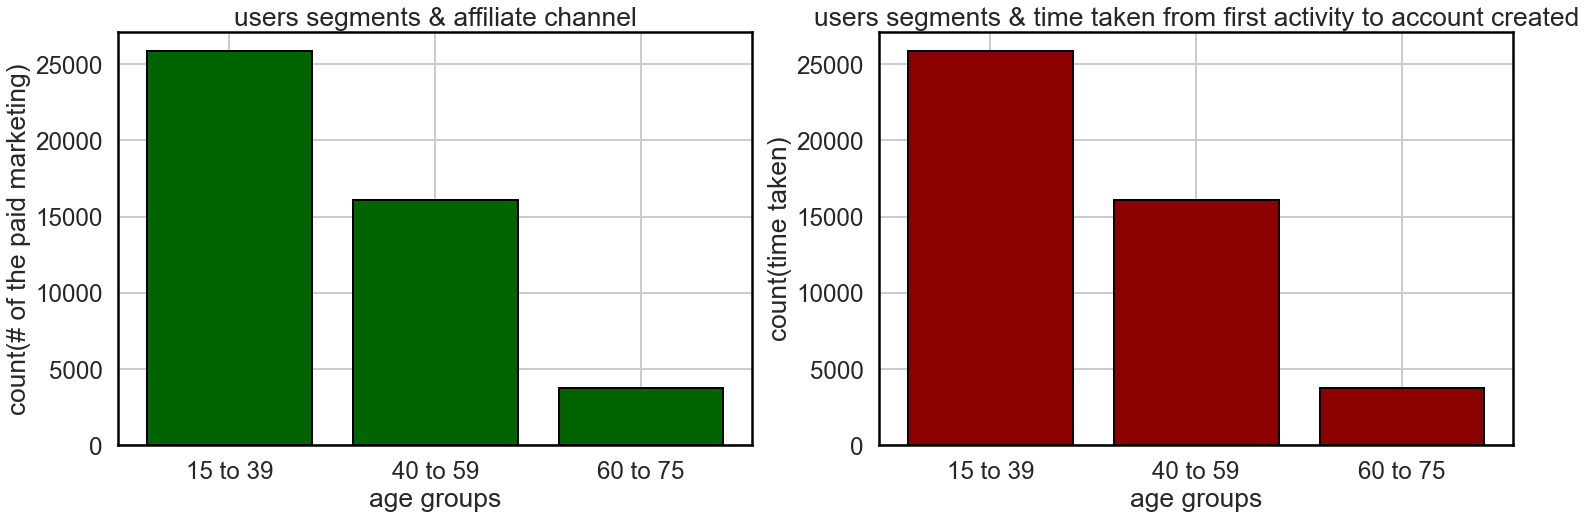

In [332]:
plt.figure(figsize = (25,35))

plt.subplot(4,2,1)
plt.bar(x,y, edgecolor='black', color="darkgreen")
plt.xlabel("age groups")
plt.ylabel('count(# of the paid marketing)')
plt.title("users segments & affiliate channel")

plt.subplot(4,2,2)
plt.bar(x,y, edgecolor='black', color='darkred')
plt.xlabel("age groups")
plt.ylabel('count(time taken)')
plt.title("users segments & time taken from first activity to account created")

- advertisings providers more likely to target the age group from 15 to 40.
- despite they are many marketing campaigns targeting the age group from 15 to 40, an observation from the data says that :
    - from 15 to 40 age group is the most age group take time from first activity until create their airbnb account, as sense of business may lead to :
        -  the marketing plan or strategy that targeting this age group needs to reformulated to grasp the users who spend more time away from their first activity

# gender & country destination

In [333]:
metric = pd.crosstab(train['gender'], train['country_destination'],
                      rownames=['gender'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
gender,,,,,,,,,,,,
-unknown-,143,491,284,715,1713,758,1040,66670,227,69,20109,3469
FEMALE,207,455,358,853,1962,881,1091,31048,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,26719,278,69,19457,3443
OTHER,1,5,3,4,13,3,5,106,3,1,116,22


- most users didnt identify their gender have high possibility to no destination found
- most first users destination is to america hence users prefers their first trip to be inside the country
- females have high possibility to NDF more than males maybe because security issue, so airbnb should increase safty ads

In [334]:
#Ratio of Males and Females
fig = {
  "data": [
    {
      "values": [95688,63041,54440,282],
      "labels": ["-unknown-","FEMALE","MALE","OTHER"],
      "domain": {"column": 0},
      "name": "Ratio of users genders between unknown,FEMALE, MALE, OTHER",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"Ratio of users genders between unknown, FEMALE, MALE, OTHER",
        "grid": {"rows": 1, "columns": 1},
        "annotations": [
            {
                "font": {
                    "size": 36
                },
                "showarrow": False,
                "text": "Gender",
                "x": 0.5,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig)

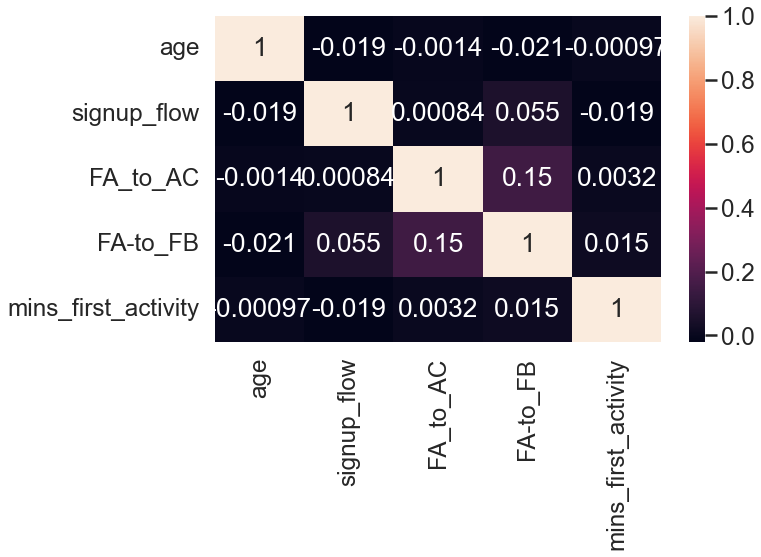

In [335]:
# correlation matrix shows how the atrributes are correlated to country destination
corr = train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True);

# The Effect of Categorical Variables on the Dependent Variable

In [336]:
cat_effect = ["gender","signup_app","signup_method","affiliate_channel",
              "affiliate_provider","first_affiliate_tracked","first_device_type"]

In [337]:
def kategorik_etki(variable):
    print("{} effect of variable on customer churn : \n".format(variable))
    #print(train.groupby(variable)["country_destination"].mean())
    plt.figure(figsize=(14,8))
    sns.countplot(y = variable, hue = "country_destination" , data = train)
    plt.show()

gender effect of variable on customer churn : 



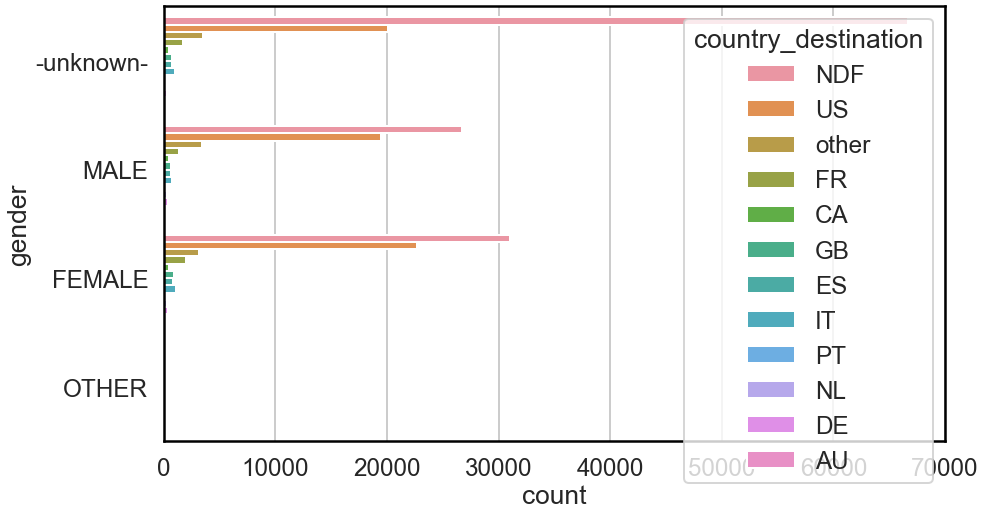

signup_app effect of variable on customer churn : 



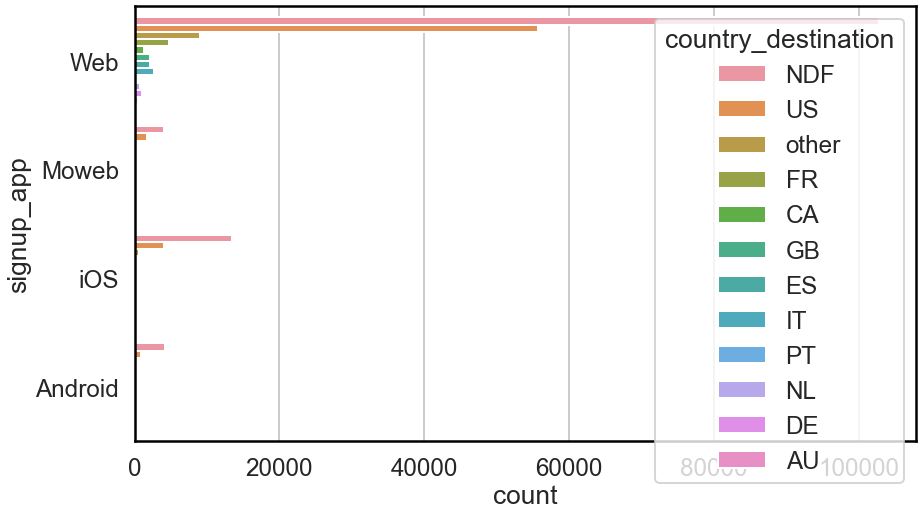

signup_method effect of variable on customer churn : 



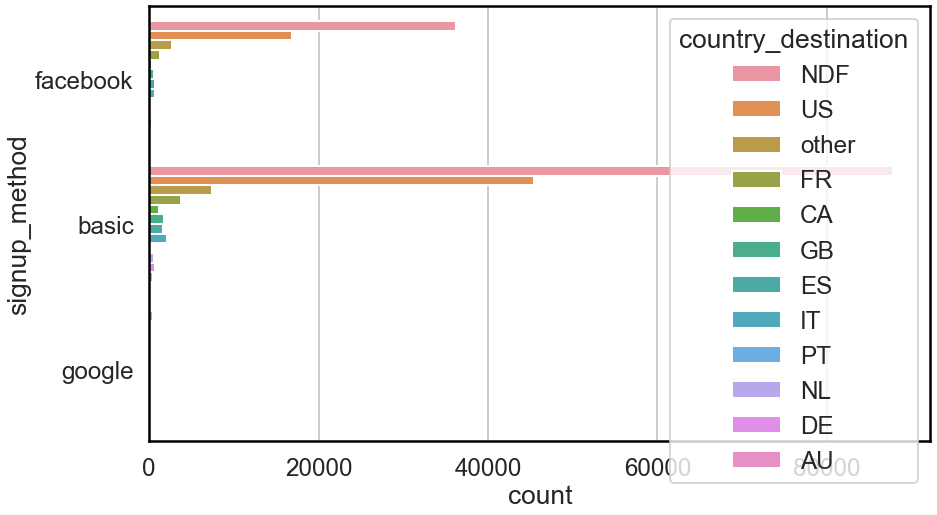

affiliate_channel effect of variable on customer churn : 



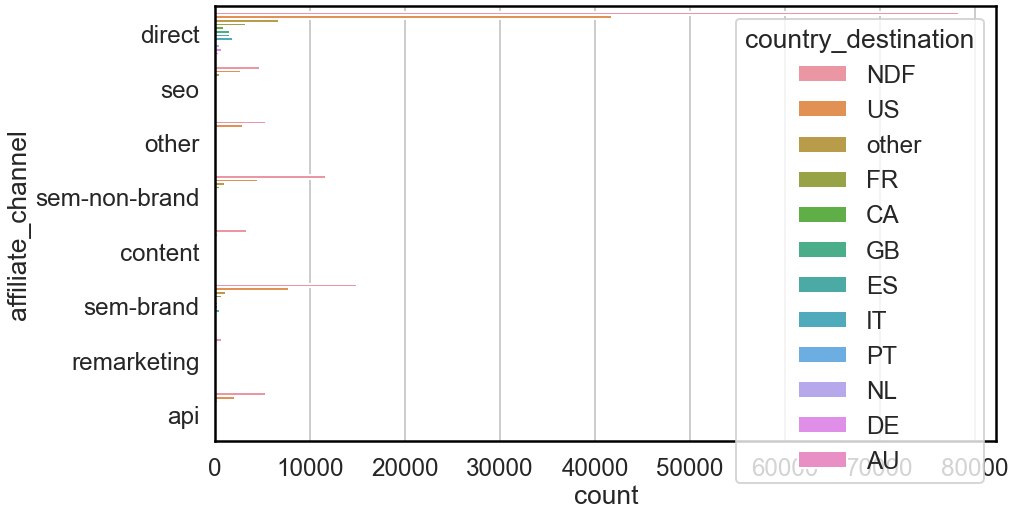

affiliate_provider effect of variable on customer churn : 



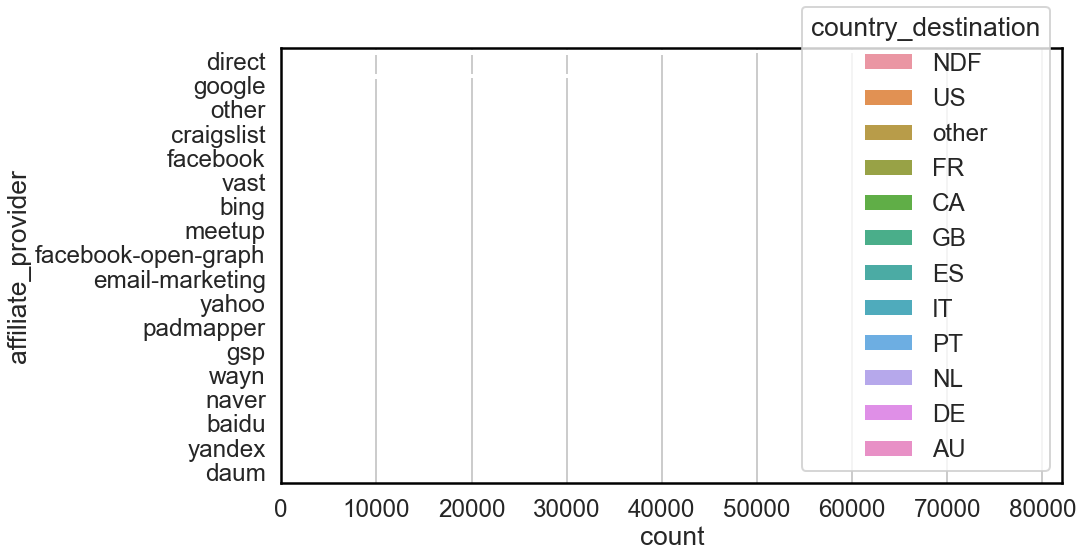

first_affiliate_tracked effect of variable on customer churn : 



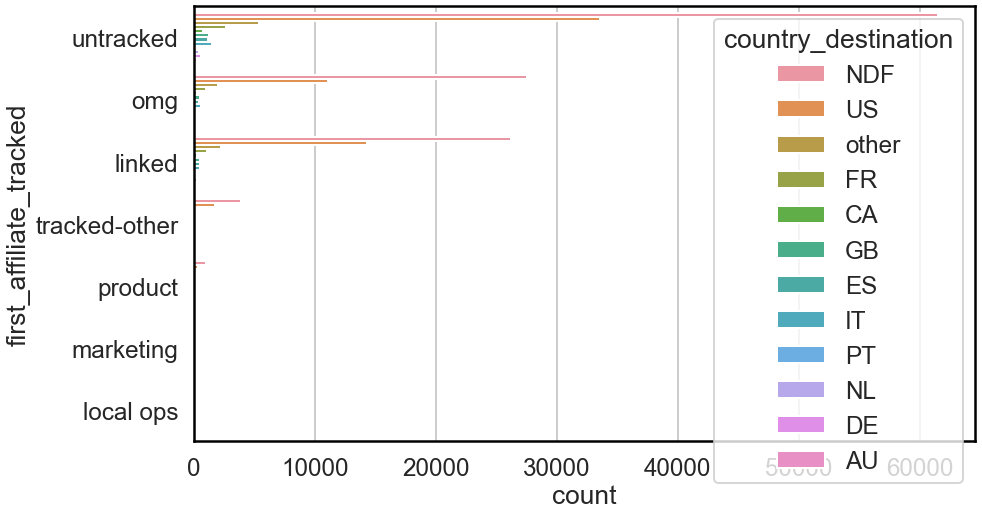

first_device_type effect of variable on customer churn : 



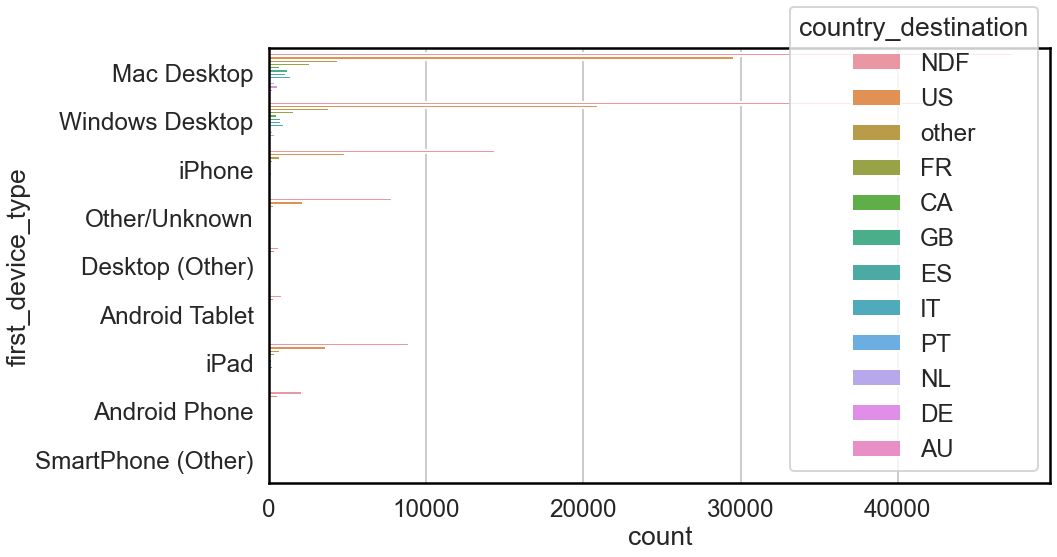

In [338]:
for i in cat_effect:
    kategorik_etki(i)

In [339]:
train['date_account_created'] = pd.to_datetime(train['date_account_created'])

<AxesSubplot: >

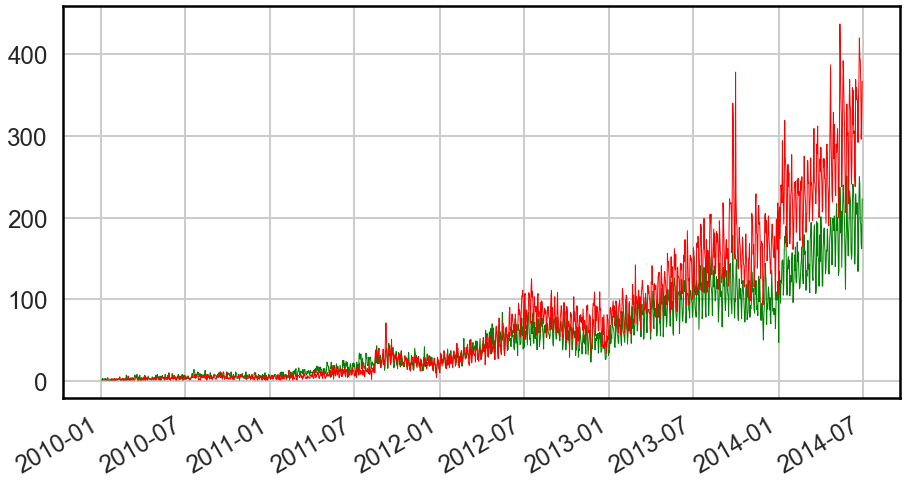

In [440]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
plt.figure(figsize=(15,8))

train[train['country_destination'] != 'NDF']['date_account_created'].value_counts().plot(kind='line', linewidth=1,color='green')
train[train['country_destination'] == 'NDF']['date_account_created'].value_counts().plot(kind='line', linewidth=1, color='red')

- The number of non booking users have increased more than the number of booking users as time passed by. This can be attributed to the fact that more people are using the platform just for exploration. Another reason might be that since the user was on the platform for a longer time, s/he was more likely to go ahead and book a space. This directly implies that the earlier the user had created an account on Airbnb, the more likelier s/he was to actually make a booking.

In [341]:
metric = pd.crosstab(train['gender'], train['country_destination'],
                      rownames=['gender'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
gender,,,,,,,,,,,,
-unknown-,143,491,284,715,1713,758,1040,66670,227,69,20109,3469
FEMALE,207,455,358,853,1962,881,1091,31048,254,78,22694,3160
MALE,188,477,416,677,1335,682,699,26719,278,69,19457,3443
OTHER,1,5,3,4,13,3,5,106,3,1,116,22


- most users didnt identify their gender have high possibility to no destination found
- most first users destination is to america hence users prefers their first trip to be inside the country
- females have high possibility to NDF more than males maybe because security issue, so airbnb should increase safty ads

In [342]:
metric = pd.crosstab(train['signup_app'], train['country_destination'],
                      rownames=['signup_app'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
signup_app,,,,,,,,,,,,
Android,3,15,9,25,26,16,21,4221,8,2,937,171
Moweb,14,29,15,34,56,33,31,4118,14,3,1718,196
Web,490,1325,996,2085,4719,2159,2639,102696,701,200,55645,9062
iOS,32,59,41,105,222,116,144,13508,39,12,4076,665


- most users use web to signup have high possibilty to choose destination
- most users use web to signup have high possibilty to NDF maybe because user experince issue


<AxesSubplot: xlabel='count', ylabel='signup_app'>

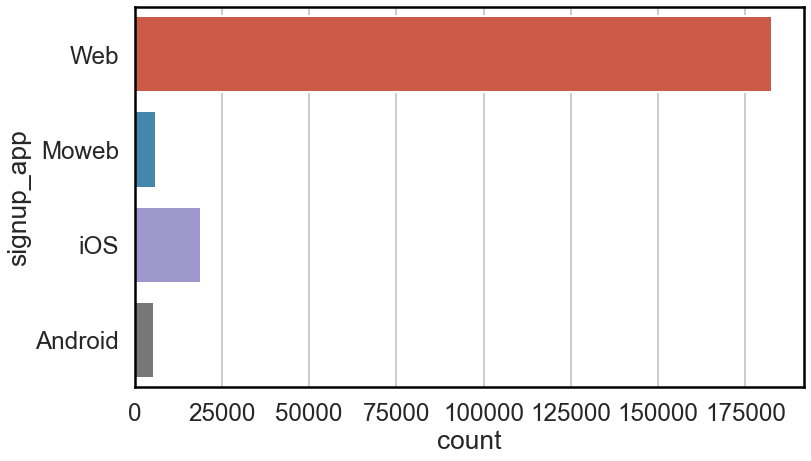

In [343]:
plt.figure(figsize=(12,7))
sns.countplot(y='signup_app', data=train)

In [344]:
metric = pd.crosstab(train['signup_method'], train['country_destination'],
                      rownames=['signup_method'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
signup_method,,,,,,,,,,,,
basic,393,1105,737,1601,3767,1727,2147,87846,560,154,45430,7430
facebook,146,322,323,646,1253,597,686,36252,202,62,16867,2652
google,0,1,1,2,3,0,2,445,0,1,79,12


- most users use their basic account to signup which means maybe they are affriad from exchanging their other info in other pltafroms like facebook and google with airbnnb (A feeling of insecurity)

<AxesSubplot: xlabel='count', ylabel='signup_method'>

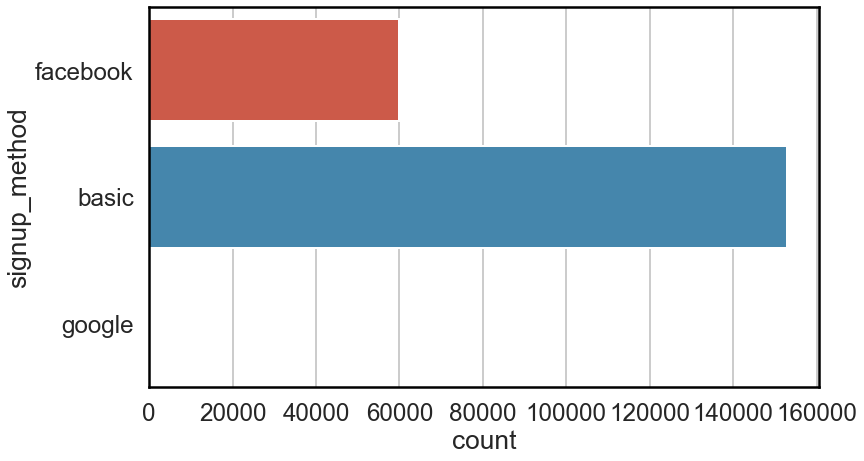

In [345]:
plt.figure(figsize=(12,7))
sns.countplot(y='signup_method', data=train)

In [346]:
metric = pd.crosstab(train['signup_flow'], train['country_destination'],
                      rownames=['signup_flow'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
signup_flow,,,,,,,,,,,,
0,433,1120,852,1772,4047,1902,2285,94845,601,177,48580,8125
1,1,5,1,5,4,3,6,878,4,0,121,19
2,24,88,55,105,268,78,116,3202,35,9,2626,275
3,28,99,77,172,361,152,201,3207,53,11,3896,565
4,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,34,0,0,2,0
6,1,2,0,8,13,3,3,137,4,2,109,19
8,1,3,4,8,7,3,13,129,4,1,50,17
10,0,0,0,0,0,0,0,1,0,0,1,0


- page 0 has high possibilty that the user will choose a destination but although has highr possibilty the user  will not choose a destination so it needs to be more dynamic, user experience and fix it's pugs if found
- page 25,24,23,12 have high possibily that the user will not choose a destination (inhance the pages performance)

In [347]:
metric = pd.crosstab(train['first_affiliate_tracked'], train['country_destination'],
                      rownames=['first_affiliate_tracked'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
first_affiliate_tracked,,,,,,,,,,,,
linked,109,296,235,549,1087,508,551,26185,155,41,14288,2283
local ops,1,0,0,0,0,0,0,25,0,0,5,3
marketing,0,1,0,0,2,1,1,76,0,0,50,8
omg,119,268,201,423,1040,498,631,27557,158,45,11053,1989
product,4,10,3,11,28,6,30,1014,7,8,354,81
tracked-other,6,39,23,34,91,47,50,3866,11,4,1787,198
untracked,288,777,579,1196,2651,1235,1528,61493,420,116,33530,5419


- most users are untracked have high probabilty to be more active either define a destination or NDF 

In [348]:
metric = pd.crosstab(train['first_device_type'], train['country_destination'],
                      rownames=['first_device_type'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
first_device_type,,,,,,,,,,,,
Android Phone,1,13,4,13,17,3,13,2088,5,0,565,81
Android Tablet,2,11,5,11,23,5,17,832,5,2,314,65
Desktop (Other),4,18,13,11,24,8,13,649,5,0,394,60
Mac Desktop,265,679,553,1098,2593,1197,1379,47350,399,111,29575,4401
Other/Unknown,18,49,25,61,165,52,57,7792,19,5,2141,283
SmartPhone (Other),0,0,0,0,2,0,1,51,0,0,20,2
Windows Desktop,171,520,339,773,1576,764,969,42564,222,76,20910,3832
iPad,42,78,62,152,356,159,225,8875,68,12,3642,668
iPhone,36,60,60,130,267,136,161,14342,39,11,4815,702


- Desktop Users either mac desktop or windows desktop book far more often than other device users. This could mean that people use smaller devices for surfing and exploration and desktops to make the actual booking. The User Experience for the apps on different devices must be tuned accordingly to achieve best results.
- chrome users are more likely to use the airbnb, so maybe it's prefeired from the n=bussiness side to cooperate with google to enhance google chrome users experince

<AxesSubplot: xlabel='count', ylabel='first_device_type'>

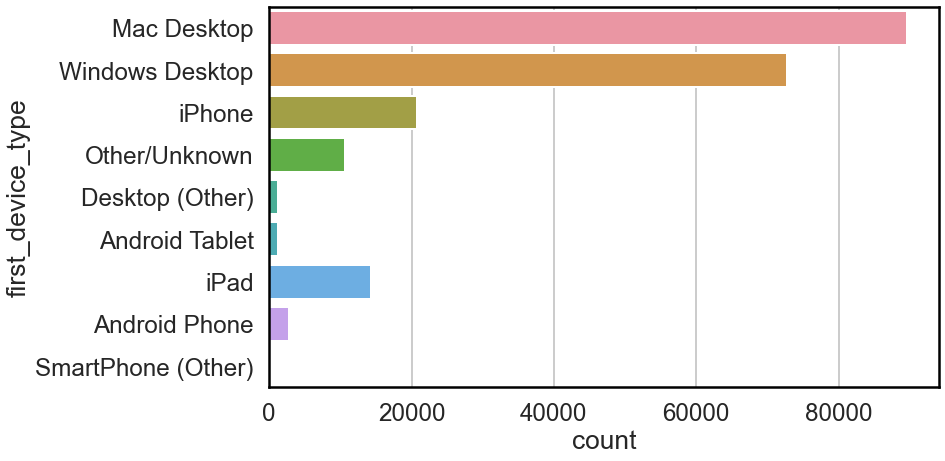

In [349]:
plt.figure(figsize=(12,7))
sns.countplot(y='first_device_type', data=train)

In [350]:
metric = pd.crosstab(train['FA_to_AC'], train['country_destination'],
                      rownames=['FA_to_AC'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
FA_to_AC,,,,,,,,,,,,
0,538,1425,1058,2246,5019,2317,2831,124489,761,217,62287,10085
1,0,1,0,0,0,0,0,2,0,0,3,1
2,0,0,0,0,0,0,0,3,0,0,0,1
3,0,0,0,0,0,0,2,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,0,0,0,0,0,0,0,0,0,0,1,0
1148,0,0,0,0,0,0,0,0,0,0,1,0
1361,0,0,0,0,0,0,0,1,0,0,0,0


- most of users more likely to create account in the same day they perfrom their firsy activity on the system hence the difference time between first activity and acciunt created is too short means at the same day the account created.

In [351]:
metric = pd.crosstab(train['FA-to_FB'], train['country_destination'],
                      rownames=['FA-to_FB'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,other
FA-to_FB,,,,,,,,,,,
0.0,101,351,211,549,870,475,683,161,62,15788,2150
1.0,87,249,168,327,770,375,439,137,29,10668,1527
2.0,30,109,84,152,421,202,182,55,9,4588,690
3.0,22,62,56,95,274,106,143,45,8,2733,472
4.0,25,53,34,79,214,83,70,28,9,2032,310
...,...,...,...,...,...,...,...,...,...,...,...
1043.0,0,0,0,0,0,0,0,0,0,0,1
1058.0,0,0,0,1,0,0,0,0,0,0,0
1153.0,0,0,0,0,0,0,0,0,0,1,0


- users are more likely to book a destinaion at the same day or more few days

In [352]:
metric = pd.crosstab(train['mins_first_activity'], train['country_destination'],
                      rownames=['mins_first_activity'], colnames=['country_destination'])
metric

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
mins_first_activity,,,,,,,,,,,,
0,32,72,56,106,246,102,148,7294,30,11,3628,543
1,31,84,37,113,233,93,147,6718,30,9,3301,486
2,28,77,51,91,217,97,133,6371,36,12,3141,454
3,26,63,42,123,240,112,137,6585,38,6,3332,532
4,32,95,70,120,277,138,147,6988,47,13,3724,640
5,31,76,51,121,288,114,168,6661,41,14,3560,658
6,25,70,43,98,269,89,145,5613,32,13,2812,541
7,31,38,34,64,172,86,104,3912,20,8,1838,414
8,16,29,26,46,112,49,55,2361,16,3,1099,244


- more or less time spent on first activity the user more likely to interact with destination either choose or NDF

# Sessions datasets

In [358]:
df_train = pd.read_csv("H:\\Data Science Repository\\Airbnb\\Data\\train_users_2.csv")

In [353]:
df_ses = pd.read_csv("H:\\Data Science Repository\\Airbnb\\Data\\sessions.csv")
df_ses

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


<AxesSubplot: xlabel='count', ylabel='device_type'>

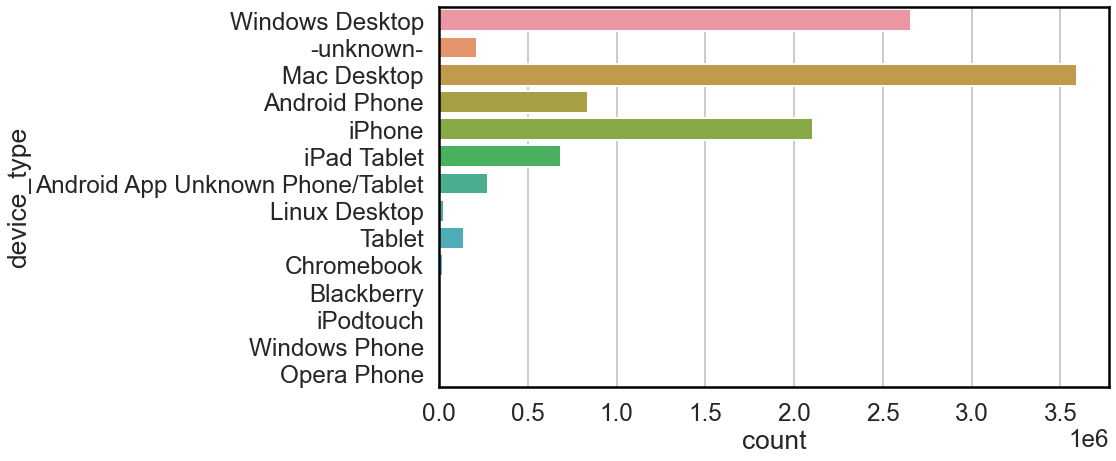

In [354]:
plt.figure(figsize=(12,7))
sns.countplot(y='device_type', data=df_ses)

<AxesSubplot: xlabel='secs_elapsed', ylabel='Density'>

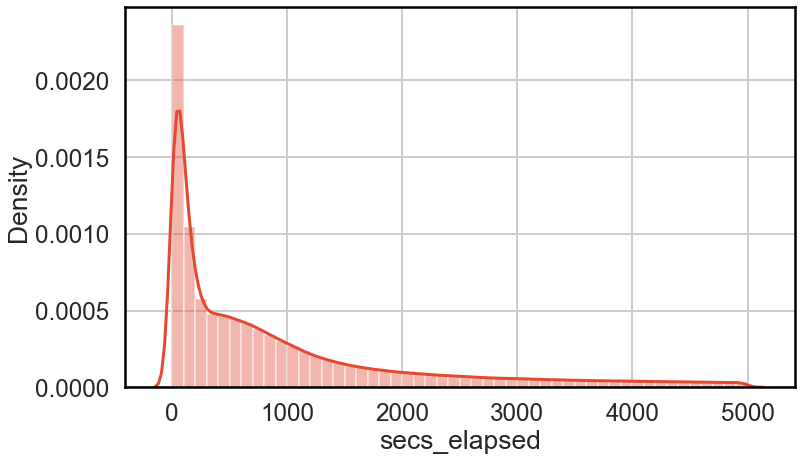

In [355]:
plt.figure(figsize=(12,7))
sns.distplot(df_ses[(df_ses['secs_elapsed'].notnull()) & (df_ses['secs_elapsed'] < 5000)]['secs_elapsed'])

- We can see that most the number of sessions greater than 1000 seconds decreases almost exponentially. It is fair to assume that most sessions were less than 1000 seconds long. To cross check this, let us look at its share in the total number of sessions.

# Sessions datasets Pre-processing

- let us proceed to build some new features that would help us get better predictions when we finally train our machine learning model. First, I'd like to extract features from our sessions dataset.
- Session Features
    - The first feature I want to engineer is the number of devices a user accesses the app through. My hunch is that if the user uses a lot of devices, it implies s/he travels very often and hence, would be likely to book an Airbnb. An additional hypothesis is that if the person travels a lot, s/he must probably be a business traveler and hence would likely be inclined to book Airbnbs within the United States.

    - The second feature I want is the total number of seconds the user has spent on Airbnb Sessions. It will be interesting to see how this correlates with out classes.

    - The third feature is average seconds per session. Again, I do not have a lot of intuition behind this step but I have a feeling this feature may be useful.

    - The fourth feature is total number of sessions. As with total seconds, this might indicate greater interest. Additonally, we'll also construct a number of session types feature to further quantify the user's interest and engagement.

    - The final feature I want to look at is number of short sessions. These are sessions less than 300 seconds long. We will construct a number of long sessions by subtracting it from total number of sessions.

# sessions data feature engineering

In [359]:
def session_features(df):
    df['total_seconds'] = df['id'].apply(lambda x: total_seconds[x] if x in total_seconds else 0)
    df['average_seconds'] = df['id'].apply(lambda x: average_seconds[x] if x in average_seconds else 0)
    df['total_sessions'] = df['id'].apply(lambda x: total_sessions[x] if x in total_sessions else 0)
    df['distinct_sessions'] = df['id'].apply(lambda x: distinct_sessions[x] if x in distinct_sessions else 0)
    df['num_short_sessions'] = df['id'].apply(lambda x: num_short_sessions[x] if x in num_short_sessions else 0)
    df['num_long_sessions'] = df['id'].apply(lambda x: num_long_sessions[x] if x in num_long_sessions else 0)
    df['num_devices'] = df['id'].apply(lambda x: num_devices[x] if x in num_devices else 0)
    return df

In [360]:
total_seconds = df_ses.groupby('user_id')['secs_elapsed'].sum()
average_seconds = df_ses.groupby('user_id')['secs_elapsed'].mean()
total_sessions = df_ses.groupby('user_id')['action'].count()
distinct_sessions = df_ses.groupby('user_id')['action'].nunique()
num_short_sessions = df_ses[df_ses['secs_elapsed'] <= 300].groupby('user_id')['action'].count()
num_long_sessions = df_ses[df_ses['secs_elapsed'] >= 2000].groupby('user_id')['action'].count()
num_devices = df_ses.groupby('user_id')['device_type'].nunique()
df_train = session_features(df_train)

# increase training data quality

- Since we already have our age groups, we can drop the age feature.

In [361]:
def set_age_group(x):
    if x < 40:
        return 'Young'
    elif x >=40 and x < 60:
        return 'Middle'
    elif x >= 60 and x <= 125:
        return 'Old'
    else:
        return 'Unknown_age'

In [362]:
df_train['age_group'] = df_train['age'].apply(set_age_group)
df_train = df_train.drop('age', axis=1)

- There are more than 50 categories of browsers although the majority use only 5. Therefore, we will club all the minor browsers into the 'Other' category.

- desktop users were most likely to book Airbnbs, followed by Tablet users, Phone users and finally people whose devices were unknown. Let us reduce first_device_type into these categories.

In [365]:
def browsers(df):
    df['first_browser'] = df['first_browser'].apply(lambda x: "Mobile_Safari" if x == "Mobile Safari" else x)
    major_browsers = ['Chrome', 'Safari', 'Firefox', 'IE', 'Mobile_Safari']
    df['first_browser'] = df['first_browser'].apply(lambda x: 'Other_browsers' if x not in major_browsers else x)
    return df

def devices(df):
    df['first_device_type'] = df['first_device_type'].apply(classify_device)
    return df

def classify_device(x):
    if x.find('Desktop') != -1:
        return 'Desktop'
    elif x.find('Tablet') != -1 or x.find('iPad') != -1:
        return 'Tablet'
    elif x.find('Phone') != -1:
        return 'Phone'
    else:
        return 'Unknown_device'

In [366]:
df_train = browsers(df_train)
df_train = devices(df_train)

- There are many categories of tracked labels although the majority are untracked. Therefore club all the minor tracked into the 'tracked' category.
- Let us do the same with the affiliates.

In [367]:
def affiliate_tracked(df):
    df['first_affiliate_tracked'] = df['first_affiliate_tracked'].fillna('Unknown_tracking')
    df['first_affiliate_tracked'] = df['first_affiliate_tracked'].apply(lambda x: 'tracked' if x != 'Unknown_tracking' and x != 'untracked' else x)
    return df

def affiliate_provider(df):
    df['affiliate_provider'] = df['affiliate_provider'].apply(lambda x: 'rest' if x not in ['direct_affiliater', 'Google', 'other_affiliaters'] else x)
    return df

def affiliate_channel(df):
    df['affiliate_channel'] = df['affiliate_channel'].apply(lambda x: 'other' if x  not in ['direct_marketing', 'content'] else x)
    return df

In [368]:
df_train = affiliate_tracked(df_train)
df_train = affiliate_provider(df_train)
df_train = affiliate_channel(df_train)

- The language used is overwhelmingly English. Therefore, it makes sense to club the others.

In [369]:
def languages(df):
    df['language'] = df['language'].apply(lambda x: 'foreign' if x != 'en' else x)
    return df

In [370]:
df_train = languages(df_train)

- people with signup flow 3 had a disproportionate number of conversions. Therefore, we will define an additional feature that identifies these users.
- We will also revert back our gender fature by filling in the NaNs with Unknown since we deduced that it will lead to an improvement in prediction.

In [371]:
df_train['is_3'] = df_train['signup_flow'].apply(lambda x: 1 if x==3 else 0)
df_train['gender'] = df_train['gender'].replace('-unknown-', 'Unknown_gender')
df_train['gender'] = df_train['gender'].fillna('Unknown_gender')

- We will drop the first_bookings and the timsestamp features. This is because :
    - they do not add any value when finally testing the model with the test set.
    - All our test users have NaNs as first booking and the timestamp is of no significance.

In [372]:
def first_booking(df):
    df = df.drop('date_first_booking', axis=1)
    return df

In [373]:
df_train = first_booking(df_train)
df_train = df_train.drop('timestamp_first_active', axis=1)

- Finally we will drop the accounts created feature as our training and test sets were separated in the middle of 2014. As a result, all test users registered only in 2014.

In [374]:
def account_created(df):
    df = df.drop('date_account_created', axis=1)
    return df

In [375]:
df_train = account_created(df_train)
df_train = df_train.set_index('id')

- Our dataset is now in a position to have one hot encoding performed on it. Let us now separate our X and y data.

In [376]:
class_dict = {
    'NDF': 0,
    'US': 1,
    'other': 2,
    'FR': 3,
    'CA': 4,
    'GB': 5,
    'ES': 6,
    'IT': 7,
    'PT': 8,
    'NL': 9,
    'DE': 10,
    'AU': 11
}

In [377]:
X,y = df_train.drop('country_destination', axis=1), df_train['country_destination'].apply(lambda x: class_dict[x])

In [378]:
# Encoding the categorical values
X = pd.get_dummies(X, prefix='is')

# Build the Model

In [379]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, stratify=y)

In [380]:
model = XGBClassifier()
model.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

# Evaluate the Model

In [435]:
y_predict = model.predict(test_X)

In [436]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [437]:
pred_y_df_2 = pd.DataFrame({'Actual Destination' : test_y, 'predicted Destination' : y_predict, "Difference" :y_predict- test_y})
pred_y_df_2[0:20]

,Actual Destination,predicted Destination,Difference
id,,,
l1a2cz4nco,1,0,-1
igir2dh89l,0,0,0
imngs4iwai,1,0,-1
sh2vp2tokq,0,0,0
kxsvoc8tiz,0,0,0
1qjhgw1dnh,1,0,-1
zesz32fwd4,0,0,0
k6rd0d9ctb,1,1,0
n8h2ikwyto,2,0,-2


In [438]:
#  prediction Summary by species
print(classification_report(test_y, y_predict))
acc = accuracy_score(test_y, y_predict)
print("the accuracy of the xgboost is = ", round(acc,308)*100, "%")

              precision    recall  f1-score   support

           0       0.70      0.84      0.76     31136
           1       0.49      0.51      0.50     15594
           2       0.14      0.00      0.00      2524
           3       0.00      0.00      0.00      1256
           4       0.00      0.00      0.00       357
           5       0.00      0.00      0.00       581
           6       0.00      0.00      0.00       562
           7       0.00      0.00      0.00       709
           8       0.00      0.00      0.00        54
           9       0.00      0.00      0.00       190
          10       0.00      0.00      0.00       265
          11       0.00      0.00      0.00       135

    accuracy                           0.64     53363
   macro avg       0.11      0.11      0.11     53363
weighted avg       0.56      0.64      0.59     53363

the accuracy of the xgboost is =  63.79701291156794 %


# Call the testing data

In [420]:
df_test = pd.read_csv('H:\\Data Science Repository\\Airbnb\\Data\\test_users.csv')
df_test['gender'] = df_test['gender'].replace('-unknown-', 'Unknown_gender')
df_test['age_group'] = df_test['age'].apply(set_age_group)
user_id = df_test['id']
df_test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,age_group
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,Young
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,Unknown_gender,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,Unknown_age
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,Unknown_gender,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,Unknown_age
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,Unknown_gender,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,Unknown_age
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,Unknown_gender,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,Unknown_age


# testing data feature engineering & pre-processing

In [421]:
def feature_engineering(df):
    df = session_features(df)
    df = df.drop('age', axis=1)
    df = browsers(df)
    df = devices(df)
    df = affiliate_tracked(df)
    df = affiliate_provider(df)
    df = affiliate_channel(df)
    df = languages(df)
    df['is_3'] = df['signup_flow'].apply(lambda x: 1 if x==3 else 0)
    df = first_booking(df)
    df = df.drop('timestamp_first_active', axis=1)
    df = account_created(df)
    df = df.set_index('id')
    df = pd.get_dummies(df, prefix='is')
    return df

In [422]:
class_dict_2 = {
     0: 'NDF',
     1: 'US',
     2: 'other',
     3: 'FR',
     4: 'CA',
     5: 'GB',
     6: 'ES',
     7: 'IT',
     8: 'PT',
     9: 'NL',
     10: 'DE',
     11: 'AU'
}

In [423]:
df_test = feature_engineering(df_test)
df_test = df_test.drop('is_weibo', axis=1)

In [424]:
y_predict = model.predict(df_test)

In [425]:
y_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [426]:
y_predict_2 = pd.DataFrame(model.predict(df_test))
y_predict_2.columns =['Predicted_Country_destination']
v = y_predict_2['Predicted_Country_destination'].apply(lambda x: class_dict_2[x])
dataFrame = pd.concat([user_id, v], axis=1)

dataFrame.head(60)

,id,Predicted_Country_destination
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF
5,szx28ujmhf,US
6,guenkfjcbq,NDF
7,tkpq0mlugk,NDF
8,3xtgd5p9dn,NDF
9,md9aj22l5a,NDF
